Loading dataset...
done in 0.009s.
Extracting tf features for LDA...
done in 0.004s.
CountVectorizer(max_df=0.95, max_features=10000, min_df=2)


 Fitting LDA models with tf features, n_samples=20000 and n_features=10000...
done in 0.221s.
['211工程', '985工程', 'ajax', 'alma', 'cnki', 'dc元数据', 'eds', 'isi', 'local', 'of', 'opac', 'opac系统', 'primo', 'proquest', 'science', 'sfx', 'summon', 'trs', 'web', 'web2', '一站式', '一站式服务', '下一代图书馆目录', '个性化服务', '中国知网', '中国科学院文献情报中心', '主题图', '云计算', '信息技术', '信息挖掘', '信息整合', '信息服务', '信息构建', '信息检索', '信息生态系统', '信息系统', '信息素养', '信息聚合', '信息资源', '信息资源建设', '信息资源整合', '信息资源整合系统', '信息资源管理', '信息资源组织', '信息资源聚合', '元数据', '元数据仓储', '元数据映射', '元数据集成', '共建共享', '关联数据', '关键问题', '分众分类法', '分布式系统', '分面检索', '功能', '功能设计', '卡片分类法', '发现平台', '发现服务', '发现系统', '可视化', '国家图书馆', '图书馆', '图书馆n', '图书馆服务', '图书馆服务平台', '图书馆系统', '图书馆联盟', '图书馆资源', '大学图书馆', '大数据', '大数据时代', '学位论文', '学术图书馆', '学术搜索', '学术资源', '学科服务', '实现技术', '导航系统', '平台建设', '应用', '开放获取', '异构数据', '快捷搜索框', '情报分析', '情景敏感', '搜索引擎', '数字图书馆', '

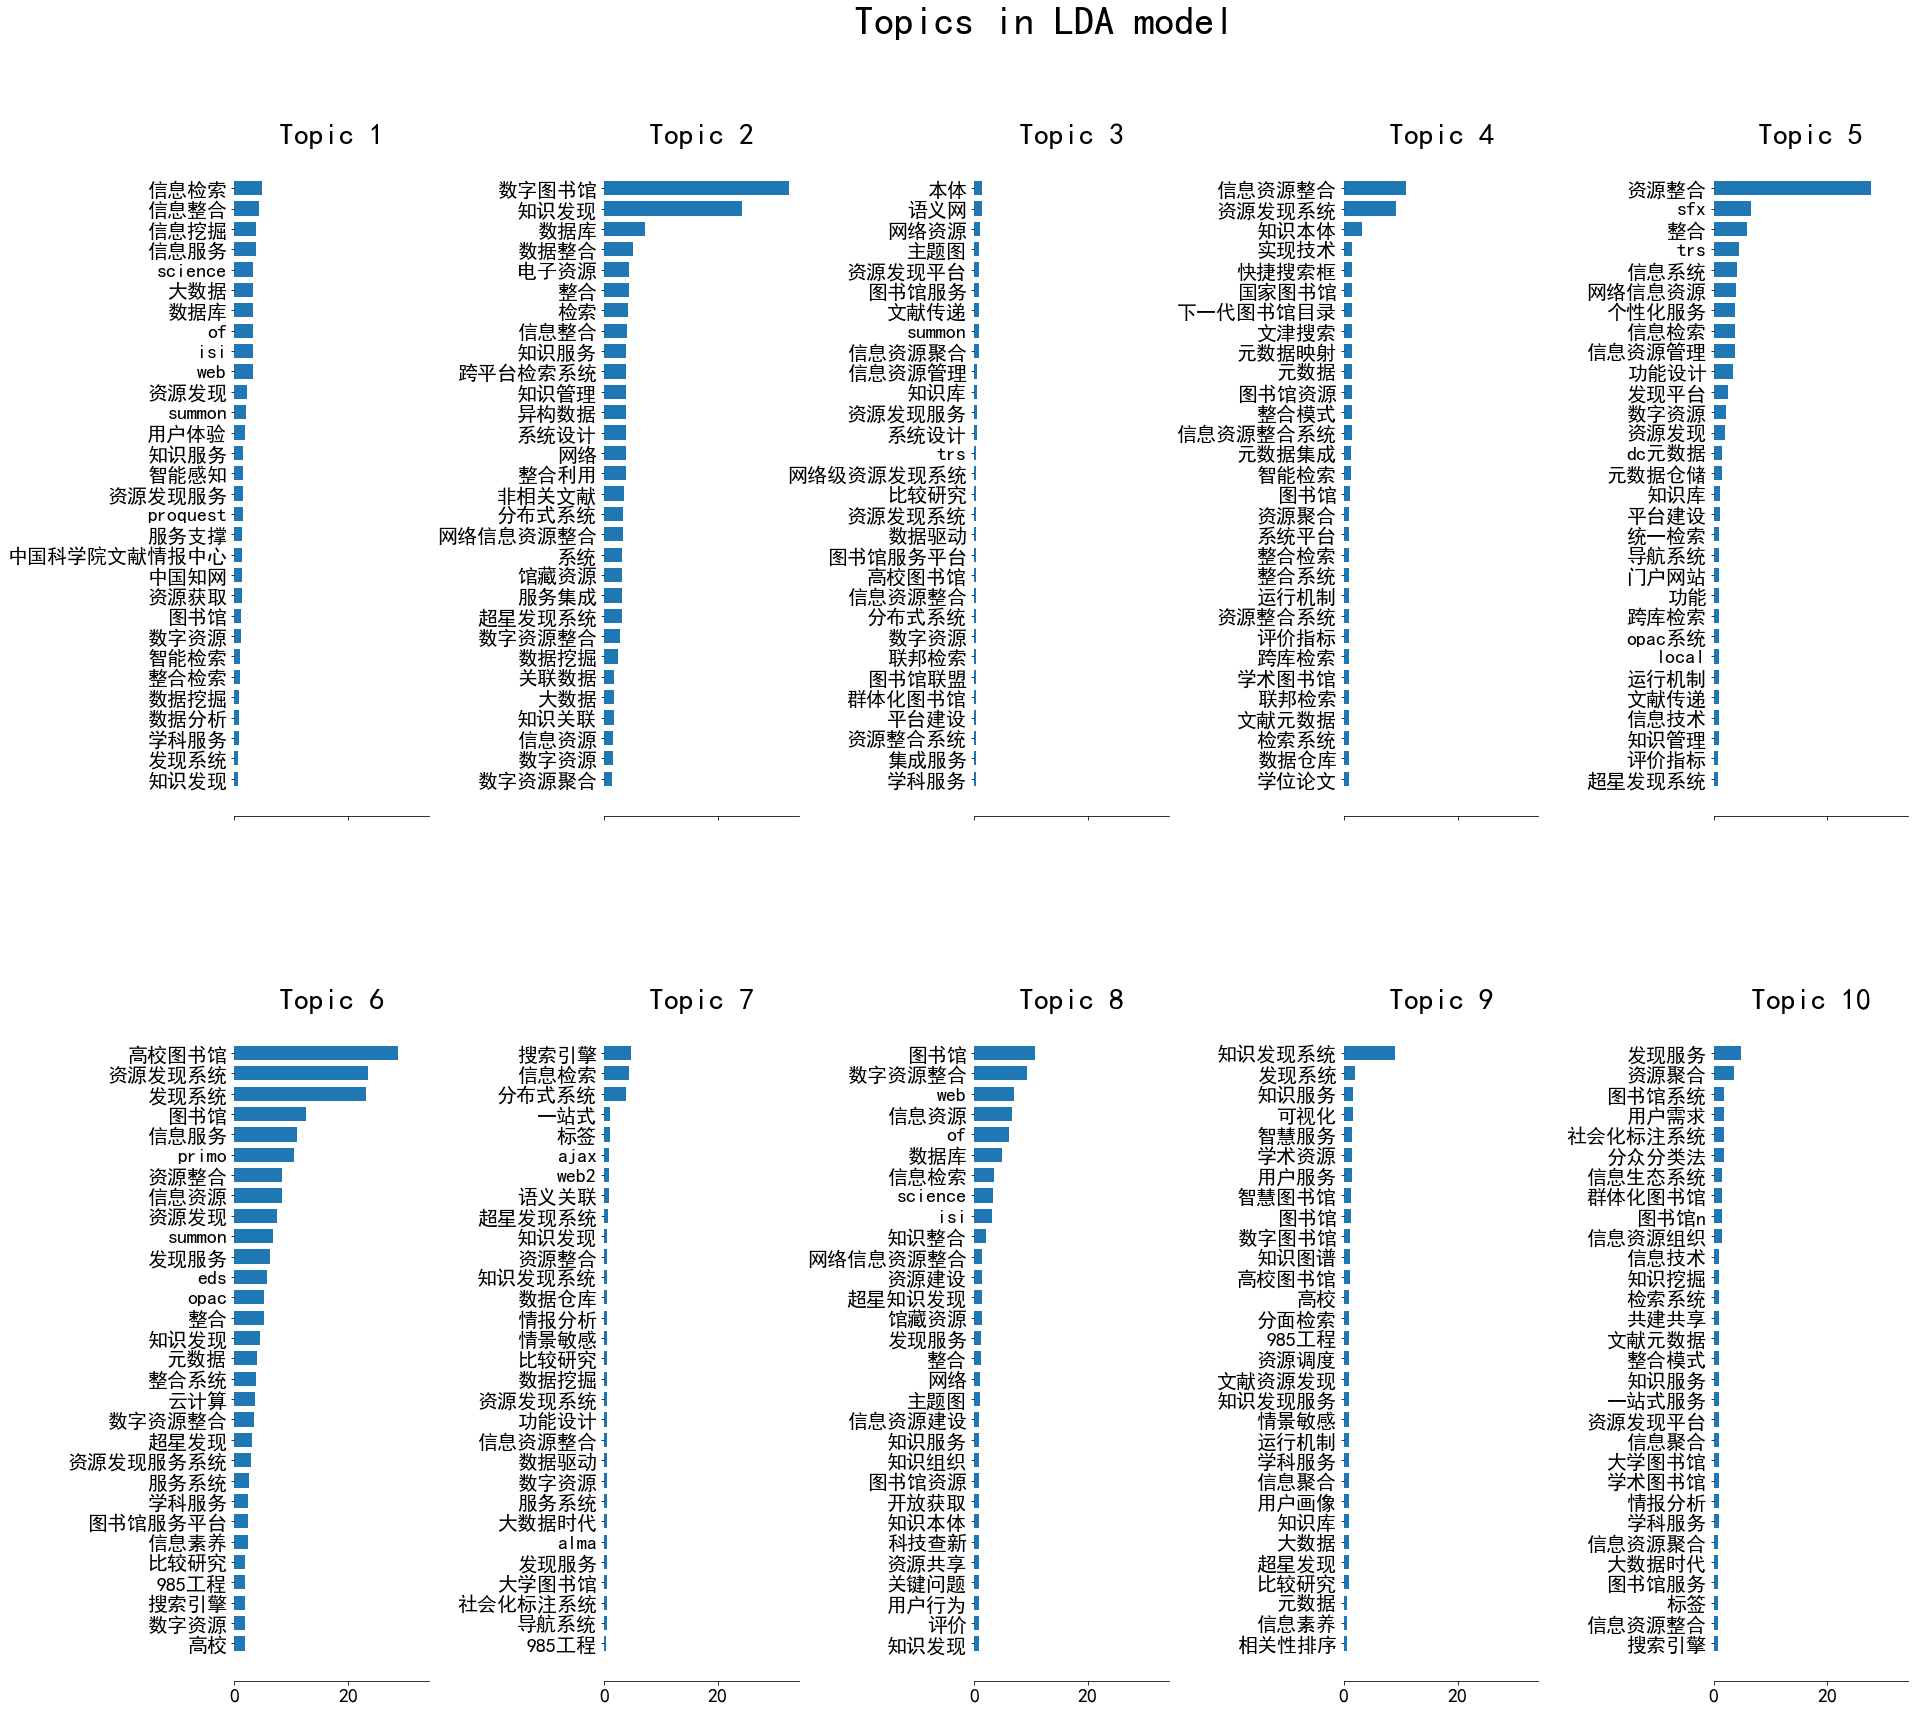

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 28 14:04:52 2021

@author: Liuhuiyun
"""
from __future__ import print_function
from time import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import pylab as mpl

##############################################

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        mpl.rcParams['font.sans-serif'] = ['SimHei'] 
        mpl.rcParams['axes.unicode_minus'] = False 
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.savefig('testplot/Topics_in_LDA_model.tif')

##############################################

print("Loading dataset...")
t0 = time()
data=[]
f=open("CNKI-20210429002635507.txt","r",encoding='utf-8')
f.readline()
for line in f:
    #print (line.startswith('K1'))
    if line.startswith('K1') == True :
        if len(line.lstrip('K1').strip())>0:
            data.append(line.lstrip('K1').strip())
print("done in %0.3fs." % (time() - t0))

data_samples=data

##############################################

n_samples = 20000
n_features = 10000
n_components = 10   # n-topics
n_top_words = 30     # key-words
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,max_features=n_features)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print(tf_vectorizer)


print('\n' * 2, "Fitting LDA models with tf features, ""n_samples=%d and n_features=%d..."% (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,learning_method='online',learning_offset=50.,random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))
tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

##############################################

print(tf_feature_names)
print(n_top_words)


In [12]:

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer )

D:\python\Anaconda\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
D:\python\Anaconda\lib\site-packages\pandas\core\internals\construction.py:587: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
D:\python\Anaconda\lib\site-packages\pandas\core\internals\cons

D:\python\Anaconda\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
D:\python\Anaconda\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.135921  0.076982       1        1  31.614576
1      0.165995  0.031301       2        1  15.472153
7      0.016934  0.061793       3        1   9.170384
3     -0.033023 -0.003725       4        1   8.583923
4     -0.030913 -0.134627       5        1   8.389783
9     -0.000804 -0.020316       6        1   6.655696
0      0.010535  0.022051       7        1   6.527605
8     -0.007105  0.003322       8        1   6.433120
6      0.010114 -0.022691       9        1   3.740763
2      0.004187 -0.014089      10        1   3.411996, topic_info=       Term       Freq      Total Category  logprob  loglift
167    资源整合  26.000000  26.000000  Default  30.0000  30.0000
88    数字图书馆  25.000000  25.000000  Default  29.0000  29.0000
165  资源发现系统  33.000000  33.000000  Default  28.0000  28.0000
129    知识发现  24.000000  24.000000  Default  27.0000  27.0000
40   信息资源整合  11.000000  11.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
149  网络信息资源   0.192633   4.398124  Topic10  -5.1976   0.2497
40   信息资源整合   0.201067  11.189164  Topic10  -5.1548  -0.6412
165  资源发现系统   0.208512  33.173764  Topic10  -5.1184  -1.6916
183   高校图书馆   0.202746  32.806431  Topic10  -5.1465  -1.7086
77     学科服务   0.193202   5.604053  Topic10  -5.1947   0.0104

[400 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.297556  211工程
0         4  0.297556  211工程
1         1  0.445317  985工程
1         8  0.222659  985工程
2         2  0.322405   ajax
...     ...       ...    ...
181       4  0.178727   馆藏资源
182       1  0.442770     高校
182       8  0.221385     高校
183       1  0.914455  高校图书馆
183       8  0.030482  高校图书馆

[334 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 8, 4, 5, 10, 1, 9, 7, 3])

In [11]:
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer )

D:\python\Anaconda\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
D:\python\Anaconda\lib\site-packages\pandas\core\internals\construction.py:587: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype != object and dtype != np.object:
D:\python\Anaconda\lib\site-packages\pandas\core\internals\cons

D:\python\Anaconda\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
D:\python\Anaconda\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.135921  0.076982       1        1  31.614576
1      0.165995  0.031301       2        1  15.472153
7      0.016934  0.061793       3        1   9.170384
3     -0.033023 -0.003725       4        1   8.583923
4     -0.030913 -0.134627       5        1   8.389783
9     -0.000804 -0.020316       6        1   6.655696
0      0.010535  0.022051       7        1   6.527605
8     -0.007105  0.003322       8        1   6.433120
6      0.010114 -0.022691       9        1   3.740763
2      0.004187 -0.014089      10        1   3.411996, topic_info=       Term       Freq      Total Category  logprob  loglift
167    资源整合  26.000000  26.000000  Default  30.0000  30.0000
88    数字图书馆  25.000000  25.000000  Default  29.0000  29.0000
165  资源发现系统  33.000000  33.000000  Default  28.0000  28.0000
129    知识发现  24.000000  24.000000  Default  27.0000  27.0000
40  